In [1]:
setwd('C:/Users/Hwang Daye/Desktop/final data')

#### 사용한 패키지 목록

In [1]:
#install.packages('ggplot2')
# library(ggplot2)
# install.packages('data.table')
# library(data.table)
# install.packages('dplyr')
# library(dplyr)
# install.packages('ggmap')
# library(ggmap)
# install.packages('rgeos')
# library(rgeos)
# install.packages('maptools')
# library(maptools)
# library(rgdal)
# library('IRdisplay')

# I. 서론

## (1) 방역 거점 선정의 필요성

우리나라는 과거 SARS, 신종인플루엔자, 메르스를 겪으며 고유한 방역 체계를 만들어왔다. 그러나 메르스 이후 대한 감염학회에서 발행한 백서에 따르면 여전히 지자체 차원의 감염병 대응체제가 부족하고 사전 대응의 패러다임으로의 전환이 필요한 것으로 보인다. 실제로 유래없는 세계적 판데믹 COVID-19에 맞서 싸우는 현 시점에서 해당 사안의 중요성이 대두되고 있다. 

COVID-19 이후 국민의 안전한 이동을 위한 교통 이용을 위해서는  무엇보다 지역별로 예방적 차원을 위한 액션이 필요하다. 이를 위해서는 지역별로 세분화된 가이드라인이 필요하고, 따라서 우리는 데이터를 기반으로 서울시 행정동별 방역 거점을 선정하는 기준을 제시하려고 한다.

AI와 같이 가축을 중심으로 퍼지는 인플루엔자와 달리 인간에게 직접적으로 타격을 주는 COVID-19와 같은 바이러스에 대해 전염의 매개인 '사람'이 아닌 '장소'를 방역의 거점으로 두는 것이 다소 낯설게 다가올 수 있다. 그러나 APTA의 질병 확산 예방을 위한 가이드라인의 Environmental Hygiene이 Targeted Cleaning을 담고 있는 점을 보면 알 수 있듯 방역과 대응에서도 거점과 우선순위를 정하는 것이 필요하다. 왜냐하면 우리는 최대한 효율적으로 한정된 재화와 인력을 배치하여야 하기 때문이다. 우리는 이를 교통 수단에 집중해 살펴봄으로써 추후 발생할 수 있는 다른 판데믹 상황에서도 안전하고 회복이 빠른 (resilient) 플랜을 제시할 것이다. 

## (2) 데이터 및 변수 선택 

### a. 서울시 지하철

 Victoria Transport Policy Institute의 보고서에 따르면 COVID-19와 같은 판데믹 상황에서의 교통 수단은 전염병에 대한 안전성과 지불 부담이라는 두 가지 변수를 통해 살펴보아야 한다. 지불 부담과 안전성을 모두 고려할 경우는 '걷기'와 '자전거 타기'가, 안전성만을 고려할 경우 '자차'가 이상적인 이동수단이다. 반면 지하철은 다른 교통수단에 비해 개인의 지불 부담이 적어서 접근가능성이 높고(Increased affordability), 전염병에 취약한 특성(pandamic safety)을 갖기 때문에 판데믹 하에서 위험이 높은 이동수단이다. 모든 사람들이 전자의 이동 수단을 이용하는 상황이 이상적이겠지만, 현실적으로는 개개인의 경제적 사회적 상황에 의해 어쩔 수 없이 위험성이 높은 교통수단을 이용하는 상황에 처한다. 가령 전염병의 취약계층인 노인층이 이동수단으로써 '걷기', '자전거 타기', '자차 운전'을 선택하는 것이 쉽지 않다. 추가적으로 대한민국은 65세 이상의 국민들에게 법정무임승차 혜택을 제공하고 있어 판데믹의 취약 계층들의 해당 교통 수단 이용률이 높은 편이라 실질적 위험이 더 크다.

 지하철과 같은 밀집된 환경에서의 접촉은 코로나19의 감염 가능성을 높일 수 있지만 현재 마스크를 의무적으로 착용해야 하는 것을 제외하고 지하철 이용에 대한 뚜렷한 제한사항이 없는 상황이다.
 

 지하철이 있는 지역들 중에서도 서울을 선택한 이유는 서울의 인구밀집도가 높고, 유동인구가 다른지역에 비해 압도적으로 높기 때문이다. 대한민국의 인구 중 서울에 거주하는 인구는 5184만 9861명 중 972만 9107명으로 약 19%를 차지한다. 또한 서울에 대한 접근성이 좋은(대중교통을 이용해서 서울에 닿을수 있는??) 수도권 인구까지 합하면 50%를 대한민국 인구의 50%를 넘긴 상황이다.(http://www.hani.co.kr/arti/area/area_general/923381.html
)

 즉, 서울의 유동인구와 지하철 이용을 분석하는 것이 '밀집된 환경에서의 이동'을 가장 잘 대표할 수 있다고 판단하여 분석 대상을 서울시의 지하철로 한정하였다.




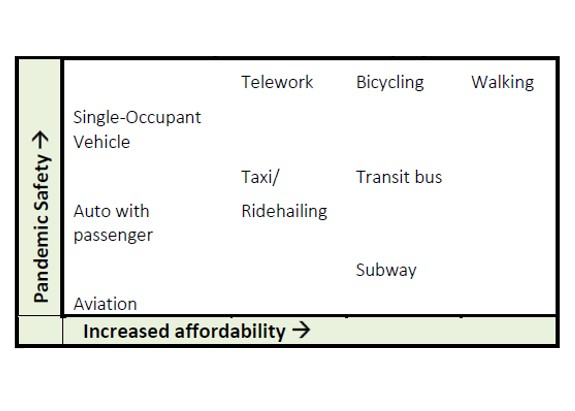

In [3]:
display_png(file = 'C:/Users/Hwang Daye/Desktop/final data/images/transportation.jpg')

### b. 노인 인구수

  방역 거점 지역을 선정하기 위한 또 다른 기준으로 65세 이상 노인 인구 수에 대한 자료를 사용하였다.  코로나 확진자 연령별 현황을 보면 20-30대 확진자 수가 절대적으로 많지만 치사율은 연령대가 높아질수록, 20-30대에 비해 70-80대의 치사율이 높아지는 경향을 띤다. 즉, 연령과 치사율이 비례하는 것은 코로나가 특히 고연령자에게 치명적임을 의미하므로 행정동 별 노인 인구 수를 방역 거점화를 결정하는 데에 사용하였다.
  김명구 외(2014)는 재난약자와 관련하여, 재난취약계층을 경제적, 신체적, 환경적, 정보적 측면에서 일반 사람들에 비해 재난에 대한 대비가 열악하고 대응능력이 부족한 집단으로 정의했다. 노인은 재난상황-특히 이번 코로나 사태-에서 신체적 기능 뿐만 아니라 정보의 접근성이 취약한 대표적인 집단이다. 따라서 방역거점을 선정하는 데 있어서 노인이 우선적으로 고려되어야 한다고 판단했다.

date,time,age,confirmed,deceased
2020-03-02,0,0s,32,0
2020-03-02,0,10s,169,0
2020-03-02,0,20s,1235,0
2020-03-02,0,30s,506,1
2020-03-02,0,40s,633,1
2020-03-02,0,50s,834,5


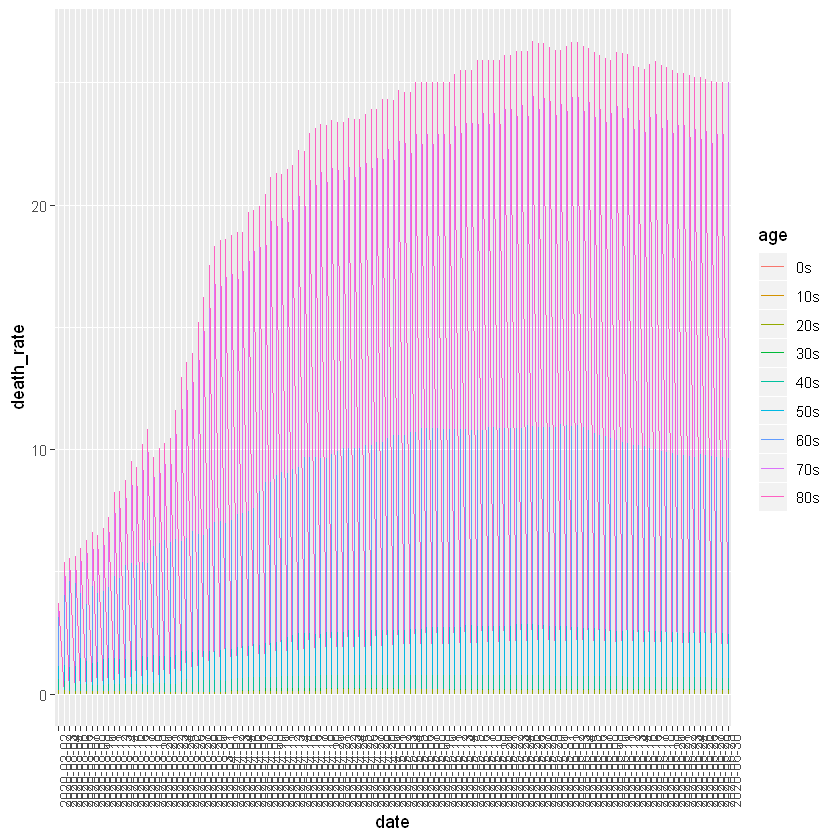

In [4]:
## 연령별 COVID 일별 치사율 그래프(2020.03-2020.06)
## 사용한 데이터: DS4C팀 COVID-19 데이터 
timeage <- read.csv("TimeAge.csv")
head(timeage)

for (i in 1:nrow(timeage)){
  timeage$death_rate[i] <- timeage$deceased[i]/timeage$confirmed[i]*100
} 

## graph ##
ggplot(data=timeage, aes(x=date, y=death_rate, group = 1))+
  geom_line(aes(color=age))+
  theme(axis.text.x=element_text(angle=90, hjust=1))

### c. 행정동

법정동과 행정동의 정의는 각각 다음과 같다. 법정동 이름은 지적도와 주소 등 모든 법적 업무에 사용하는 행정구역 공식 명칭이다. 행정동은 행정기관들이 법정동의 주민 수, 면적 등을 고려해 효율적인 행정 편의 및 관리를 위해 설정한 행정구역이다. 행정동은 주민 수를 반영하기 때문에, 각 행정동 마다 비슷한 수의 사람들이 있다고 가정할 수 있다. 따라서 분석과정에서 단순히 인원수가 많은 지역이 우선순위를 점하는 경우를 방지할 수 있다.



# II. 본론

## (1) 이용한 데이터 목록 및 전처리 

### a. 데이터 목록

(1) **행정동 지도 파일** : 아래 github 주소*에서 대한민국 행정동 경계 2020년 4월 1일 기준 반영부분 반영 geojson 파일을 다운로드 받아 QGIS 프로그램을 통해 shp 파일로 변환하였다. *https://github.com/vuski/admdongkor/tree/f8882a06e1a8d6cb4be76b8c156b3c0b2a5f2797

(2) **행정동 코드 파일 (listdong_final)**:  행정동 지도 파일에서 각각 7자리, 10자리 행정동 코드를 추출하여 파일로 만들었다. KT데이터의 adstrd_master의 adstrd_code와 병합하였다.

(3) **행정동별 유동인구**: KT 데이터 교통 데이터 거래소의 [행정동별 유동인구] 데이터를 활용하였다. 'adstrd_master'파일의 adstrd_code가 (2)의 행정동 코드와 일치하지 않아 listdong_final 일을 이용해 매핑하여 전처리에 활용하였다.

(4) **노인 인구수 데이터**: 서울 열린데이터 광장의 데이터를 활용하였다. 2020년 4월을 마지막으로 주민등록상 등재된 65세 이상 인구 수를 행정동 별로 보여준다.링크 : https://data.seoul.go.kr/dataList/10020/S/2/datasetView.do

(5) **지하철 이용자수 데이터**: 서울 열린데이터 광장의 데이터를 활용하였다. 2020년 1월부터 3월까지의 역별 지하철역 승하차 인원의 정보를 보여준다. 링크 : https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

(6) **지하철 역 목록 데이터**: 서울 내 위치한 지하철역 목록을 작성하기 위해 서울 열린데이터 광장에서 서울특별시 노선별 지하철역 정보 데이터를 구하였다. 먼저 수도권 지하철 역 목록에서 행정구역 상 서울특별시 내에 위치한 지하철 역들만 선별한 후, 각 지하철 역의 1번 출구를 기준으로 검색이 쉬운 법정동 주소를 기입하였고 중복되는 환승역들을 정제하였다. 1차적으로 정리된 자료에서 각 전철역 주소를 법정동에서 행정동으로 변환하였으며 1번출구가 경계선에 위치한 경우(예. 개봉역) 해당 전철역의 출구 개수가 더 많은 행정동으로 주소를 기입하였다. 링크: https://data.seoul.go.kr/dataList/OA-15442/S/1/datasetView.do

### b. 라이브러리 목록
data.table
dplyr
ggmap
ggplot2
rgeos
maptools
rgdal

### c. 전처리 (이하 코드 참조)


In [5]:
# KT 데이터 로드
pop_2019 <- fread("fpopl_2019.csv")
pop_2020 <- fread("fpopl_2020.csv")
head(pop_2019)
head(pop_2020)

base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
20190101,16,F,age_35,11740590,126
20190101,16,F,age_45,11380640,166
20190101,16,F,age_50,11545710,113
20190101,16,F,age_55,11710641,252
20190101,16,M,age_15,11650550,70
20190101,16,M,age_25,11290600,411


base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
20200111,0,F,age_00,11320681,8
20200111,0,F,age_00,11350621,17
20200111,0,F,age_00,11500591,7
20200111,0,F,age_00,11590651,4
20200111,0,F,age_00,11650531,25
20200111,0,F,age_00,11650621,4


In [6]:
# 매핑용 행정동 코드 데이터 로드
list_dong <- read.csv(file = 'listdong_final.csv')
head(list_dong)

list_dong$adm_cd <- sapply(list_dong$adm_cd, as.character )
list_dong$adm_cd2 <- sapply(list_dong$adm_cd2, as.character )
head(list_dong)

n_pop_2019 <- merge(x = pop_2019, y = list_dong, by = 'adstrd_code', all.x = TRUE)
n_pop_2020 <- merge(x = pop_2020, y = list_dong, by = 'adstrd_code', all.x = TRUE)
head(n_pop_2019)

adstrd_code,adm_nm,id,adm_cd,adm_cd2
11710631,가락1동,394,1124066,1171063100
11710632,가락2동,395,1124067,1171063200
11710620,가락본동,393,1124065,1171062000
11530595,가리봉동,272,1117070,1153059500
11545510,가산동,275,1118051,1154551000
11500603,가양1동,250,1116064,1150060300


adstrd_code,adm_nm,id,adm_cd,adm_cd2
11710631,가락1동,394,1124066,1171063100
11710632,가락2동,395,1124067,1171063200
11710620,가락본동,393,1124065,1171062000
11530595,가리봉동,272,1117070,1153059500
11545510,가산동,275,1118051,1154551000
11500603,가양1동,250,1116064,1150060300


adstrd_code,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,popltn_cascnt,adm_nm,id,adm_cd,adm_cd2
11110515,20190101,3,F,age_15,11,청운효자동,15,1101072,1111051500
11110515,20190101,20,F,age_50,63,청운효자동,15,1101072,1111051500
11110515,20190101,5,F,age_35,16,청운효자동,15,1101072,1111051500
11110515,20190101,21,F,age_00,1,청운효자동,15,1101072,1111051500
11110515,20190101,0,F,age_45,98,청운효자동,15,1101072,1111051500
11110515,20190101,19,F,age_10,14,청운효자동,15,1101072,1111051500


In [7]:
# 정렬 바꾸기 
## 꼭 필요한 프로세스는 아니지만 시각적으로 알아보기 쉽게 만들었다.
## 날짜 - 행정동 - 시간 - 나이 - 인구 - 성별 순으로 정렬
order_2019 <- n_pop_2019[order(n_pop_2019$base_ymd, n_pop_2019$adm_cd, n_pop_2019$tmzon_se_code, n_pop_2019$agrde_se_code, n_pop_2019$sexdstn_se_code )]

order_2020 <- n_pop_2020[order(n_pop_2020$base_ymd, n_pop_2020$adm_cd, n_pop_2020$tmzon_se_code, n_pop_2020$agrde_se_code, n_pop_2020$sexdstn_se_code )]


In [8]:
#시간대별로 동별 유동인구 합계 구하기

time_2019 <- 
    order_2019 %>%
    group_by(base_ymd, adm_cd, tmzon_se_code) %>%
    summarize(popltn_sum = sum(popltn_cascnt))

time_2020 <-
    order_2020 %>% 
    group_by(base_ymd, adm_cd, tmzon_se_code) %>%
    summarize(popltn_sum = sum(popltn_cascnt))

#일별 동별 유동인구 합계 구하기
day_2019 <- time_2019 %>% 
    group_by(base_ymd, adm_cd) %>%
    summarize(popltn_sum_day = sum(popltn_sum))

day_2020 <- time_2020 %>% 
    group_by(base_ymd, adm_cd) %>%
    summarize(popltn_sum_day = sum(popltn_sum))

#동별 유동인구 합계 구하기
dong_2019 <- day_2019 %>% group_by(adm_cd) %>% summarize(popltn_sum_dong = sum(popltn_sum_day))

dong_2020 <- day_2020 %>% group_by(adm_cd) %>% summarize(popltn_sum_dong = sum(popltn_sum_day))

## (2) 변수 시각화

### a. 행정동 지도에 세 가지 변수 시각화하기

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Hwang Daye\Desktop\final data\haengjung_dong_map.shp", layer: "haengjung_dong_map"
with 3487 features
It has 4 fields
Integer64 fields read as strings:  OBJECTID 


Regions defined for each Polygons


long,lat,order,hole,piece,id,group
126.9769,37.57565,1,FALSE,1,0,0.1
126.9770,37.56919,2,FALSE,1,0,0.1
126.9760,37.56934,3,FALSE,1,0,0.1
126.9754,37.56932,4,FALSE,1,0,0.1
126.9743,37.56926,5,FALSE,1,0,0.1
126.9690,37.56819,6,FALSE,1,0,0.1


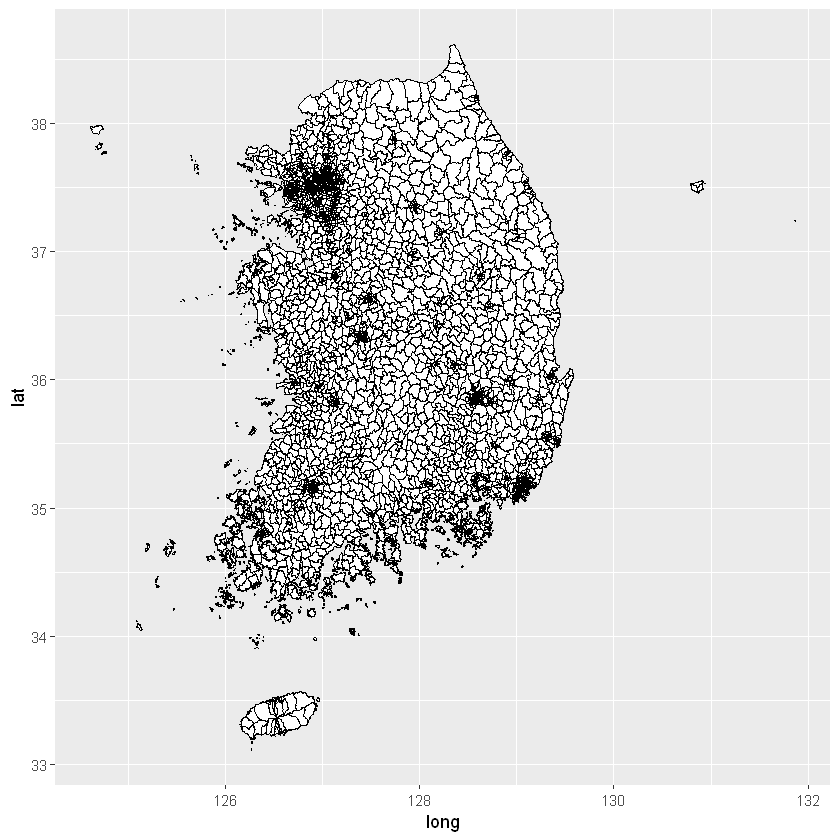

In [9]:
## 행정동 지도 그리기 (map outline data)
h <- readOGR('haengjung_dong_map.shp')

h <- spTransform(h, CRS('+proj=longlat'))
h_map <- fortify(h)
head(h_map)

ggplot() + geom_polygon(data = h_map, aes(x = long, y = lat, group = group),
                        fill = 'white', colour = 'black') ## 전국 읍동리 지도 


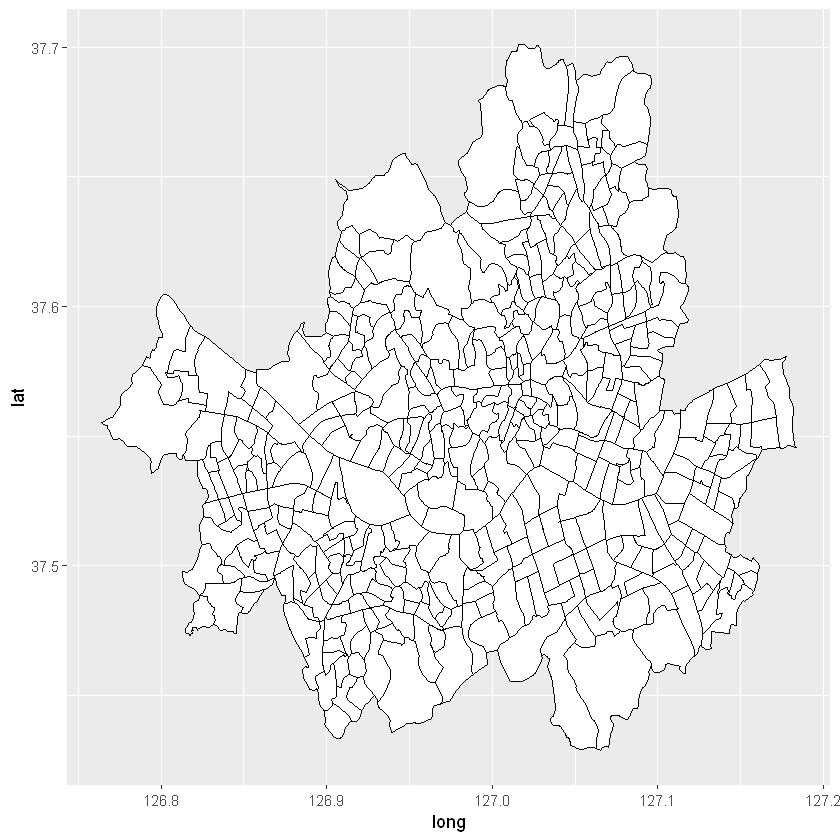

In [10]:
h_map$id <- as.numeric(h_map$id) # id의 class가 character라서 numeric으로 변환
hmap <- h_map[h_map$id <= 423 | h_map$id == 3478,] # id를 QGIS로 확인한 결과 0~423, 3478번이 서울시에 해당

ggplot() + geom_polygon(data = hmap, aes(x = long, y = lat, group = group),
                        fill = 'white', colour = 'black') ## 서울 행정동 지도

**hmap_final**은 hmap 파일에 행정동을 기준으로 행정동별 노인 인구의 수, 지하철 이용자의 수, 유동인구의 합계를 각각의 열로 병합한 것이다. |

X,adm_cd,h_dong,id,long,lat,order,hole,piece,group,adm_nm,adm_cd2,자치구,old,subway,pop_sum,scale,level
1,1101053,사직동,0,126.9769,37.57565,1,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2
2,1101053,사직동,0,126.9770,37.56919,2,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2
3,1101053,사직동,0,126.9760,37.56934,3,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2
4,1101053,사직동,0,126.9754,37.56932,4,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2
5,1101053,사직동,0,126.9743,37.56926,5,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2
6,1101053,사직동,0,126.9690,37.56819,6,FALSE,1,0.1,사직동,1111053000,종로구,1818,88477,15898453,1.192922,2


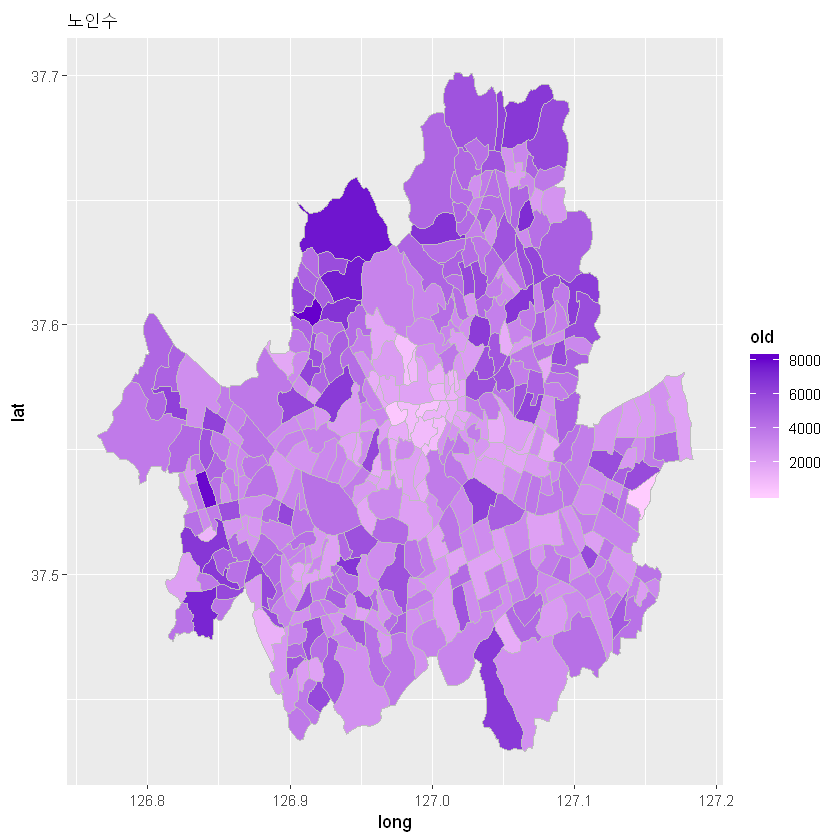

In [11]:
## map fill data
hmap_final <- read.csv('hmap_final.csv') 
head(hmap_final)

### 노인수 시각화
ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group, fill = old),
                        color = 'gray') + scale_fill_gradient(low = "#FFCCFF", high = "#6600CC", 
                                                              space = "Lab", guide = "colourbar") + ggtitle('노인수')

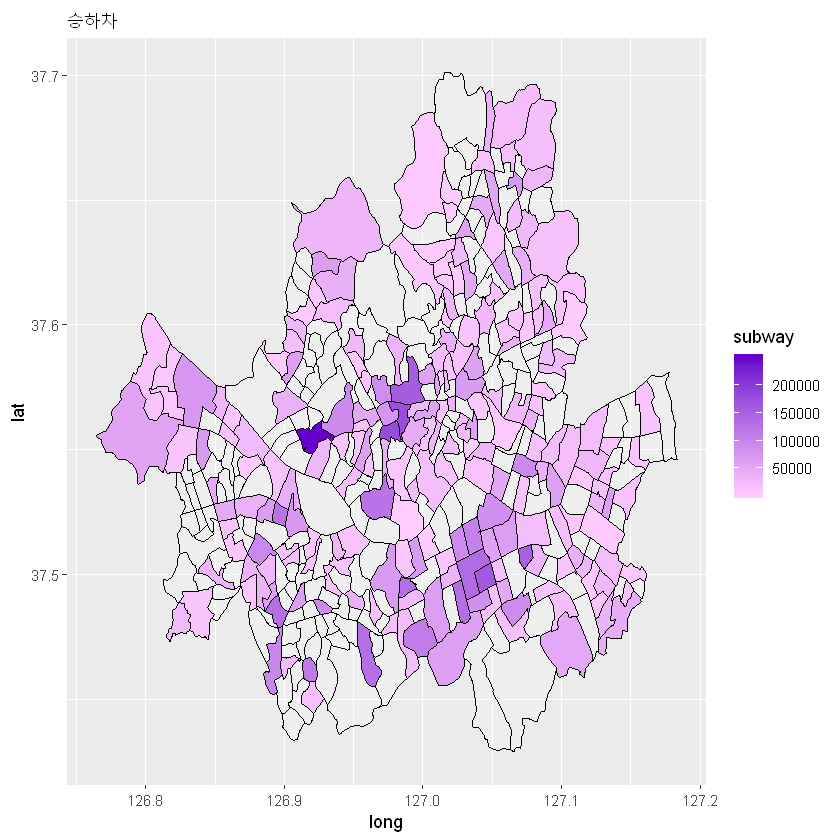

In [12]:
## 승하차 최종 맵(배경 + 틀) 

hmap_final %>% arrange(id, order) %>% filter( subway > 0) %>% #id와order의 순서대로 정렬해주고 승하차 > 0인 것만 filtering
    ggplot() + geom_polygon(data = hmap, aes(x = long, y = lat, group = group), # 그 위에 ggplot을 그림, 서울시 투명 배경
                            fill = 'white', colour = 'black', alpha = 0.2) + 
    geom_polygon(aes(x = long, y = lat, group = group, fill = subway), color = 'black') + 
    scale_fill_gradient(low = "#FFCCFF", high = "#6600CC", space = "Lab", guide = "colourbar") + # 틀 입혀줌
    ggtitle('승하차')

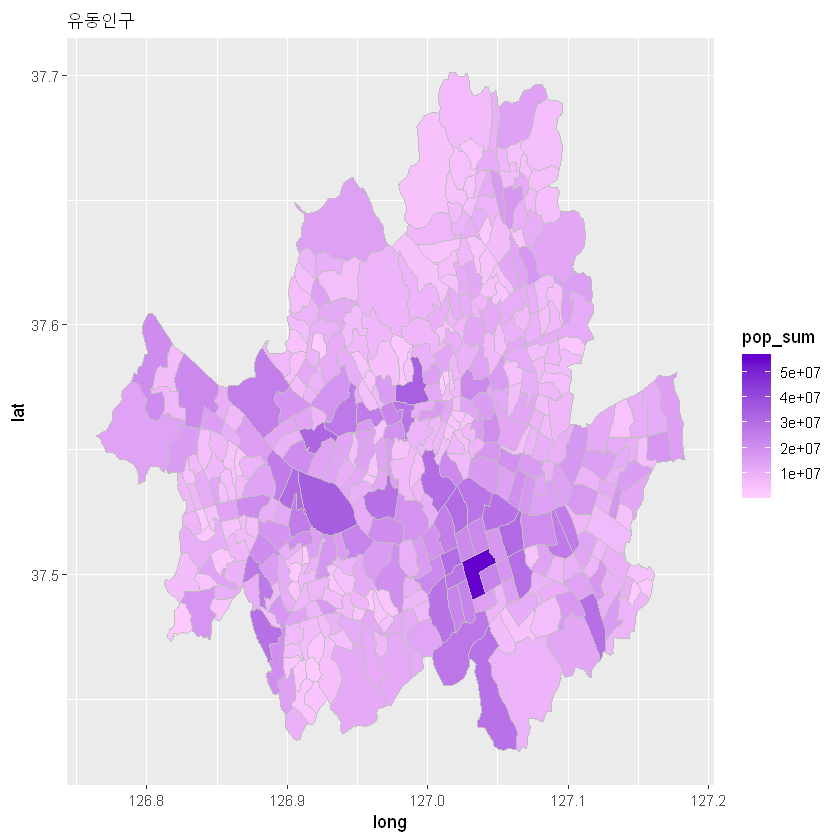

In [13]:
##유동인구 시각화
ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group, fill = pop_sum),
                        color = 'gray') + scale_fill_gradient(low = "#FFCCFF", high = "#6600CC", 
                                                              space = "Lab", guide = "colourbar") + ggtitle('유동인구')                                                           

### b. Bubble plot에 세 변수 시각화

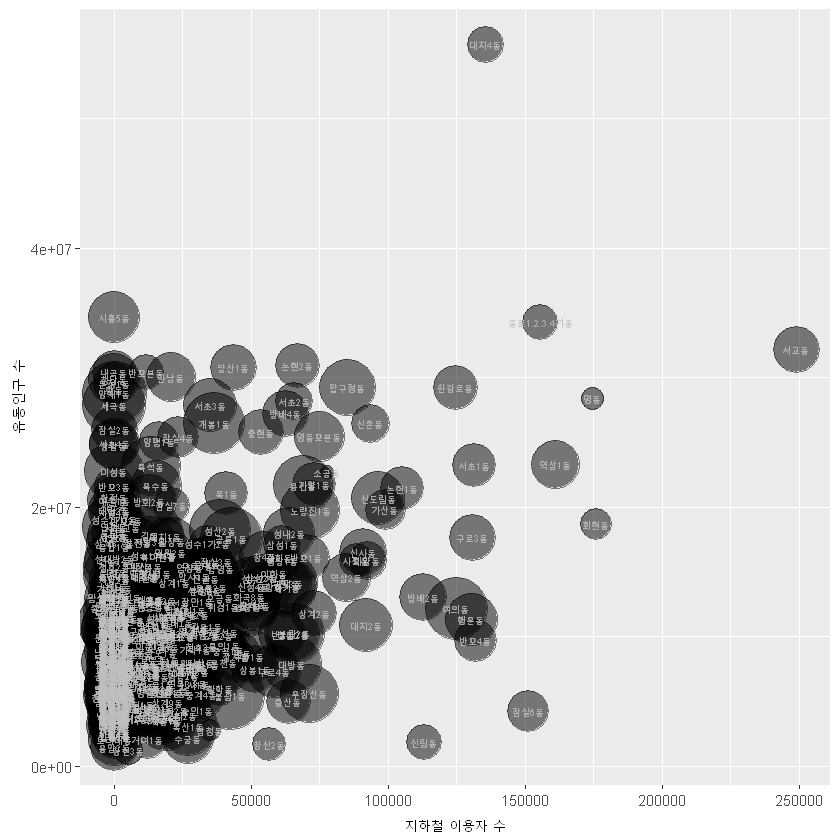

In [14]:
### bubble plot

for_bub <- hmap_final[,c(3,4,14,15,16)]
for_bub1 <- for_bub[-which(duplicated(for_bub[,1])),]

ggplot(data = for_bub1, aes(x=subway, y=pop_sum, size=old))+
  geom_point(alpha = 0.5) +
  scale_size(range = c(0.5, 20), name ="노인 인구 수") +
  ylab("유동인구 수") +
  xlab("지하철 이용자 수") +
  theme(legend.position = "none") +
  geom_text(aes(subway, pop_sum, label = h_dong), colour = I(alpha("grey", 0.85)), size = 2)

전체 행정동 중 대치4동, 서교동, 종로 1,2,3,4가동, 명동, 등이 방역 거점의 우선순위가 될 것으로 보인다.

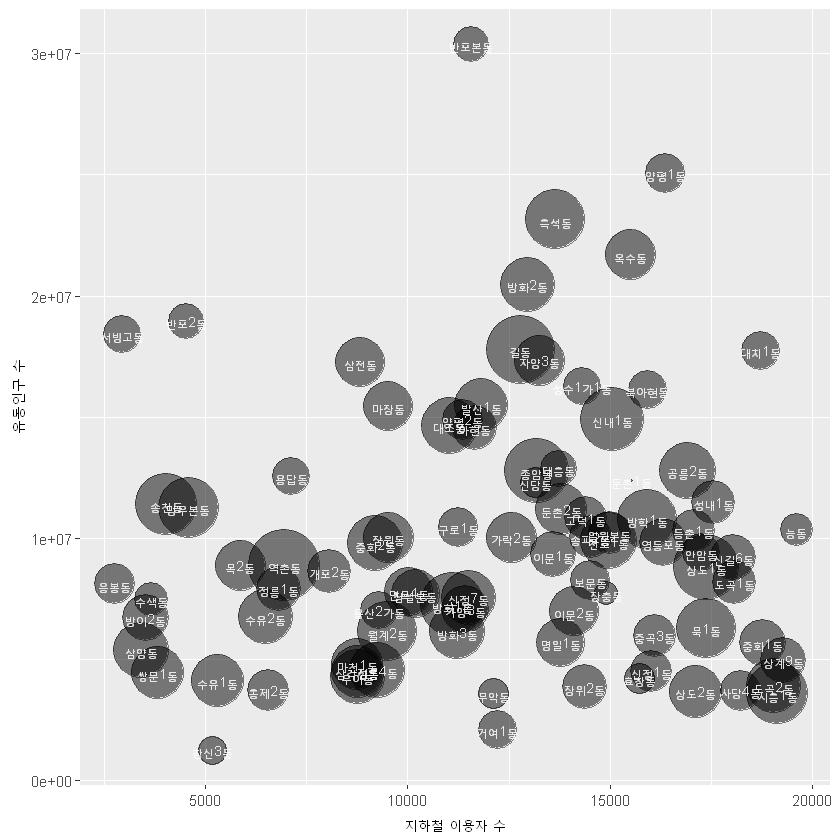

In [15]:
for_bub2 <- for_bub1 %>% filter(subway > 0, subway < 20000, pop_sum < 35000000) 
ggplot(data = for_bub2, aes(x=subway, y=pop_sum, size=old))+
  geom_point(alpha = 0.5) +
  scale_size(range = c(0.5, 20), name ="노인 인구 수") +
  ylab("유동인구 수") +
  xlab("지하철 이용자 수") +
  theme(legend.position = "none") +
  geom_text(aes(subway, pop_sum, label = h_dong), colour = I(alpha("white", 0.85)), size = 3)

노인인구에 대해 집중하기 위해 유동인구와 지하철 이용인구의 범위를 제한하여 그래프를 그려보았다. 노인인구가 많은 역촌동, 종암동, 길동, 상도1동 등이 방역 거점의 우선 순위가 될 것으로 보인다.

### c. 방역거점 우선순위 단계별 제시

노인인구 수, 유동인구, 지하철 이용인구라는 세 가지 변수를 통합하여 방역거점 우선순위를 단계별로 시각화한다. 
변수 통합 방법은 세 변수를 각각 표준화하여 합계를 구하였고, 단계는 quantile함수를 이용하여 총 4 단계로 나누었다.

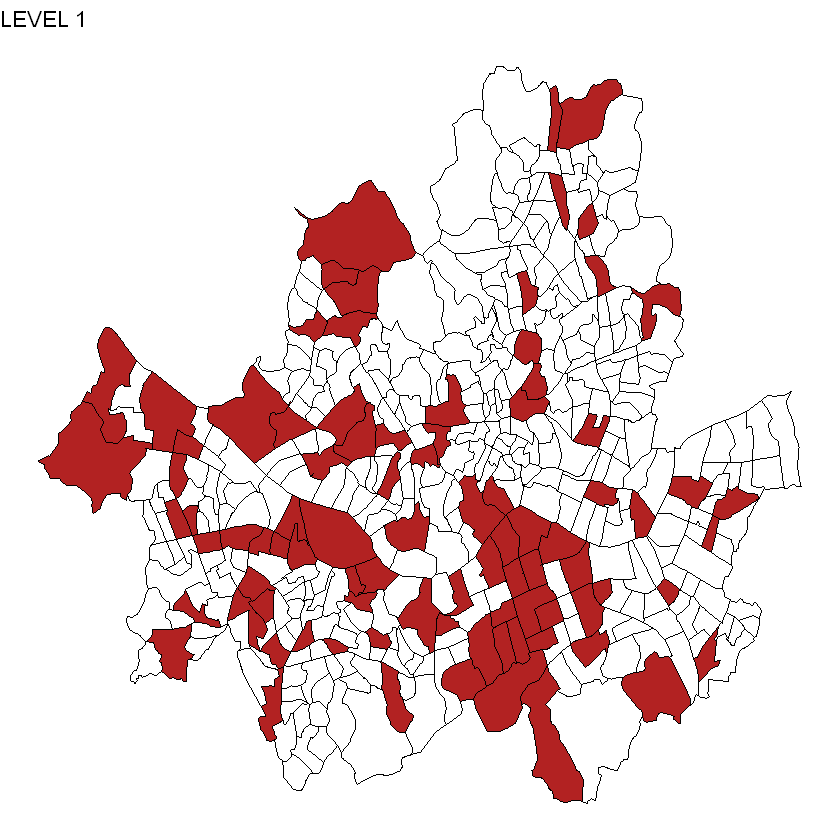

In [16]:
# 방역거점 1순위
hmap_final %>% arrange(id, order) %>% filter(level == 1) %>% 
  ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group),
                          fill = 'white', colour = 'black', alpha = 0.2) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = level),
                 color = 'black', fill = 'firebrick')  + theme_void() + ggtitle('LEVEL 1')

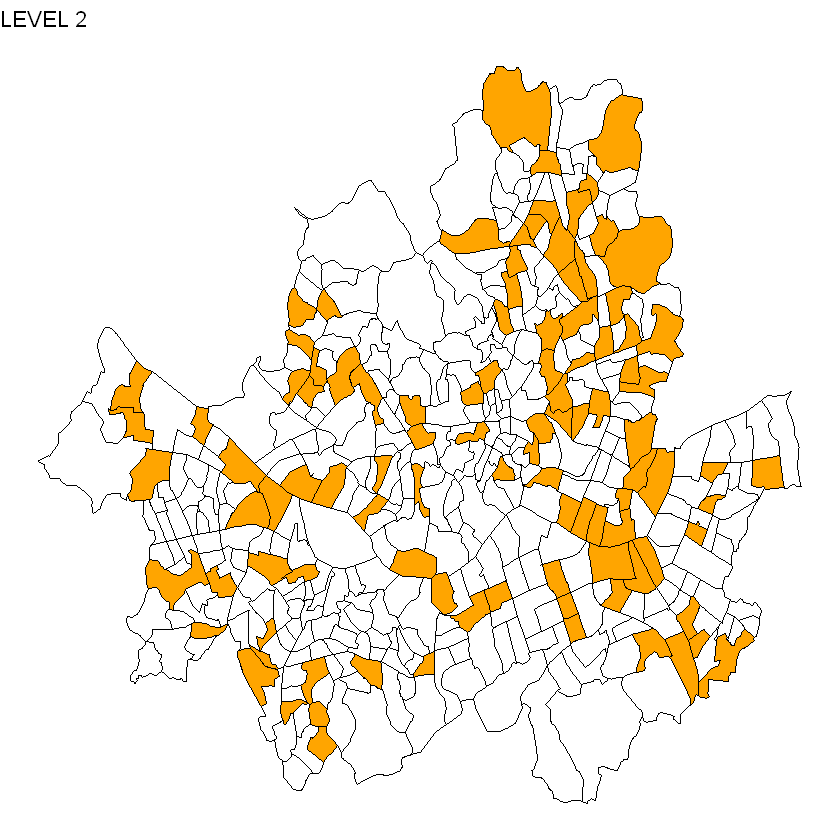

In [17]:
# 방역거점 2순위
hmap_final %>% arrange(id, order) %>% filter(level == 2) %>% 
  ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group),
                          fill = 'white', colour = 'black', alpha = 0.2) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = level),
               color = 'black', fill = 'orange')  + theme_void() + ggtitle('LEVEL 2')

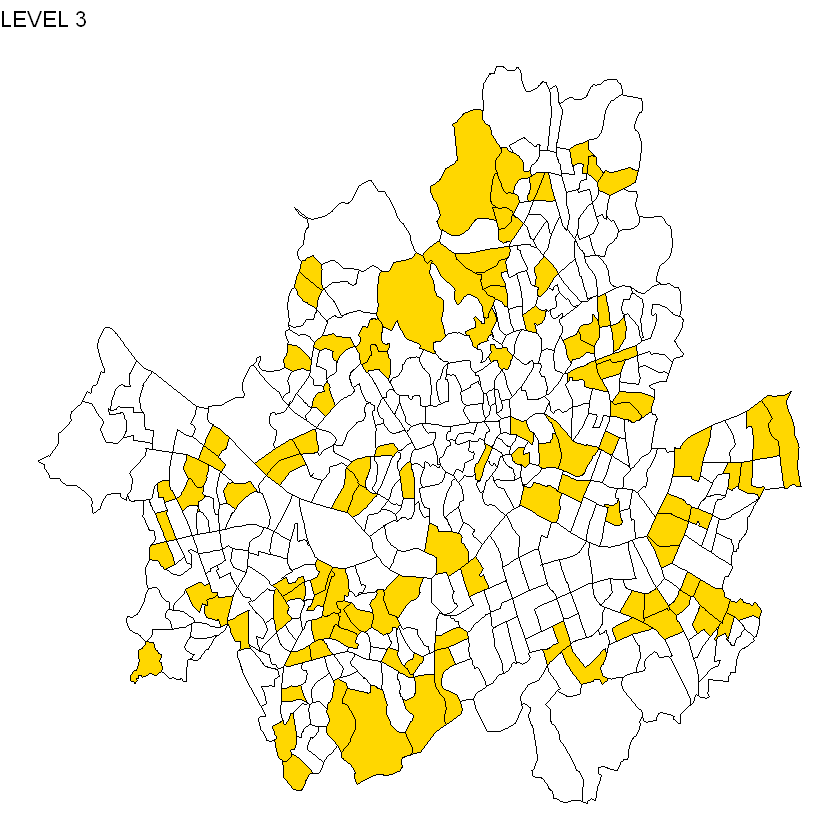

In [18]:
# 방역거점 3순위
hmap_final %>% arrange(id, order) %>% filter(level == 3) %>% 
  ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group),
                          fill = 'white', colour = 'black', alpha = 0.2) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = level),
               color = 'black', fill = 'gold')  + theme_void() + ggtitle('LEVEL 3')

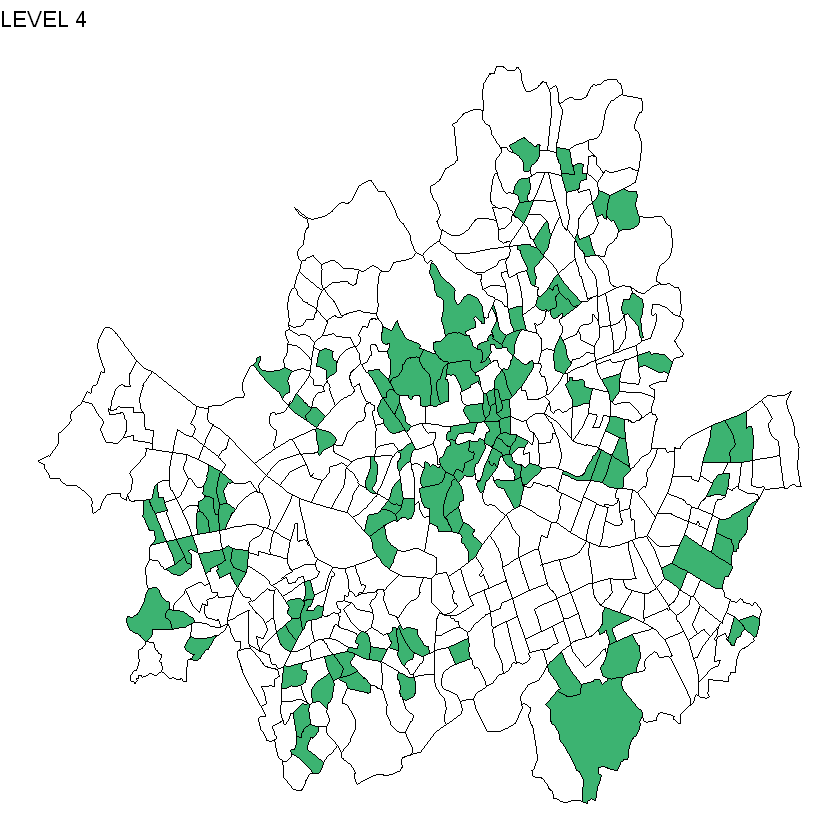

In [19]:
# 방역거점 4순위
hmap_final %>% arrange(id, order) %>% filter(level == 4) %>% 
  ggplot() + geom_polygon(data = hmap_final, aes(x = long, y = lat, group = group),
                          fill = 'white', colour = 'black', alpha = 0.2) +
  geom_polygon(aes(x = long, y = lat, group = group, fill = level),
               color = 'black', fill = 'medium sea green')  + theme_void() + ggtitle('LEVEL 4')

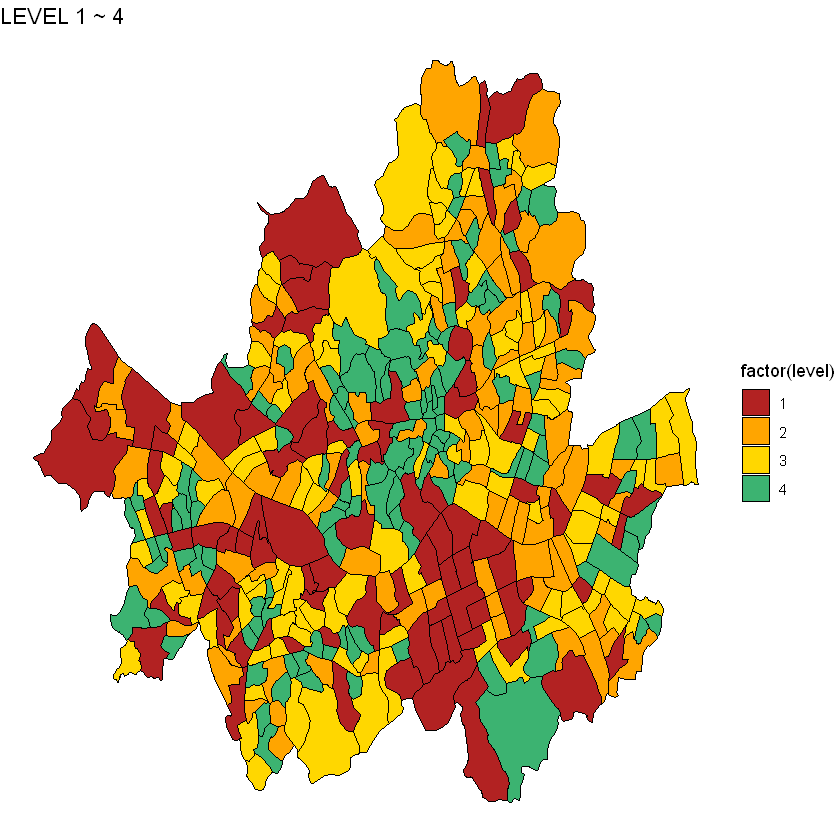

In [20]:
# 방역거점 1~4순위
col_list <- c('firebrick', 'orange', 'gold', 'medium sea green') # 색상표 설정
hmap_final %>% arrange(id, order) %>% ggplot() +
  geom_polygon(aes(x = long, y = lat, group = group, fill = factor(level)),
               color = 'black') + 
  scale_fill_manual(values = col_list) + theme_void() + ggtitle('LEVEL 1 ~ 4')

# III. 결론


### (1) 최종 제안 사안 

 해당 분석에서는 전염병의 취약계층인 노인 인구수와, 혼잡함의 지표로써의 유동 인구수,  타겟 교통수단인 지하철의 이용자수를 시각화하였다. 행정동이 유사한 인구수를 가진 단위로써 적용될 수 있기 때문에, 각 변수들의 표준화된 값의 합을 위험도 점수로 간주하였고, 해당 값이 높을수록 방역의 필요가 우선시된다고 판단하였다. 위험도 점수를 기준으로 행정동들을 총 4개의 level로 분류하였고, level1에서 level4에 이를 수록 방역의 필요성이 적다고 간주하였다. 가령, level1의 경우 종로 1,2,3,4가동, 회현동, 명동, 한강로동, 한남동 등이 포함되고, level2의 경우에는 사직동, 소공동, 남영동, 마장동 등이 포함된다. level1에 해당되는 행정동에 대해서는 해당 지역의 지하철 역사를 코로나 이후에도 거점 소독을 정기적으로 실시하고, 추후 유사한 재난 상황이 발생됨에 따라 적용 범위를 level2, level3, level4의 범주로 확장시켜나갈 것을 제안한다.

 포스트 코로나 시대의 교통에서 가장 달라질 부분은 시민들이 코로나를 겪었고, 그 과정에서 형성된 새로운 기준에 따라 교통수단을 선택하게 된다는 점이다. 앞서 서론에서 언급하였던 그래프에서 알 수 있듯, 많은 사람들은 사회적 거리두기를 할 수 있는 걷기, 자전거타기, 자차이용, 재택 근무 등을 이어나갈 것이지만, 그러한 안전하고 경제적 지불이 용이한 교통수단을 모두가 선택할 수 있는 것은 아니다. 따라서 교통과 판데믹 상황에서 모두 취약 계층인 노인 인구의 이용 비율이 높은 지하철의 안전한 이용을 위한 정책에 방역 거점 level을 고려할 것을 제안한다. 또한, 단순한 타겟 위생 외에도, 이용자들이 경각심을 잃지 않되 안전한 교통 수단 이용을 위한 정보 전달에서 소외되지 않기 위한 시청각 자료를 해당 행정동 중심으로 관련 시설에 비치할 것을 제안한다.


### (2) 시사점

 단계별 방역거점을 살펴보면 1단계 행정동이 포함된 지역이 서초구, 강남구, 마포구, 강서구와 같이 특정 지역구들에 집중되어 있음을 볼 수 있다. 이를 통해 지역구 차원에 특화된 개별적 대응 방식도 필요하지만, 현실을 고려할 때 이를 넘어선 전체적인 차원의 경제적 인적 지원의 필요성을 확인할 수 있었다.
이번 분석에서는 단순히 변수들의 표준값을 더하여 퀀타일로 4등분하여 방역거점 순위를 선정하였지만, 실제 적용에 있어서 변수 선정과 가중치 부여, 그리고 단계의 수를 상황에 맞게 조정한다면 보다 유연한 가이드라인으로써 활용할 수 있을 것으로 보인다. 
다만 이러한 과정에서 특정 행정동이 타 행정동에 비해 방역의 우선 순위가 되는 것이 해당 행정동에 대한 부정적 인식을 부여하거나 타 행정동에 대한 차별로써 해석되지 않도록 소통에 있어 주의가 필요하다. 

## IV. 참고문헌


* 김명구 외. 2014. 자연재난에 의한 재난취약계층의 재난안전복지
개선 방향. 한국위기관리논집. 10(9): 113-135.

* 대한감염학회 (2017). 메르스 연대기 KSID White Paper on Chronicles of MERS

* Litman, T. (2020). Pandemic-Resilient Community Planning: Practical Ways to Help Communities Prepare for, Respond to, and Recover from Pandemics and Other Economic, Social and Environmental Shocks.



# 본 저작물의 저작권은 Apache License v2.0을 따릅니다.